## **Data Visualization**


## **Overview**
In this part of the project the foucs on :
-    Create a database, load data into it, and connect to it using SQLite3 with Python.
-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-21 08:25:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  33.7MB/s    in 1.0s    

2024-01-21 08:25:24 (33.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


##  list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64


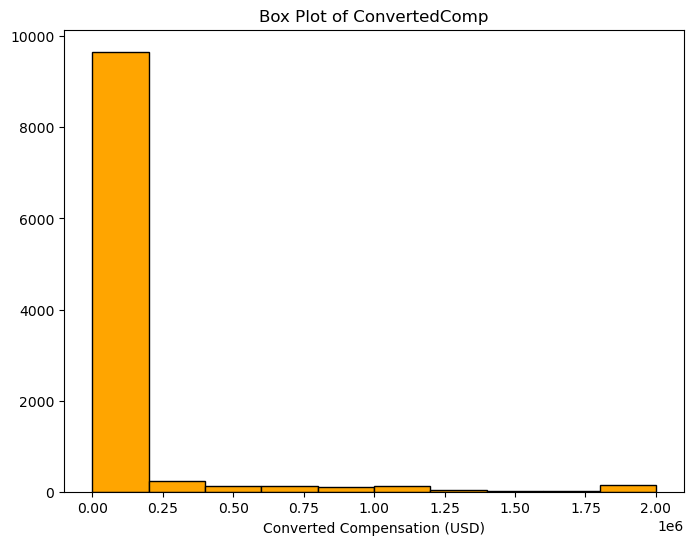

In [ ]:
# your code goes here
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT * FROM master

"""

df = pd.read_sql_query(QUERY,conn)


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
x=df['ConvertedComp']
print(x)
plt.figure(figsize=(8, 6))
plt.hist(x, bins=10, color='orange', edgecolor='black')
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.show()

### Box Plots


Plot a box plot of `Age.`


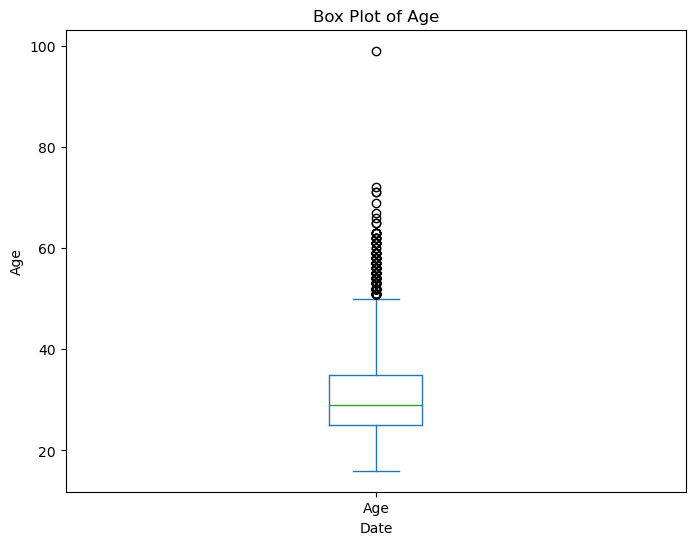

In [ ]:
# your code goes here
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='box')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.xlabel('Date')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Figure size 800x600 with 0 Axes>

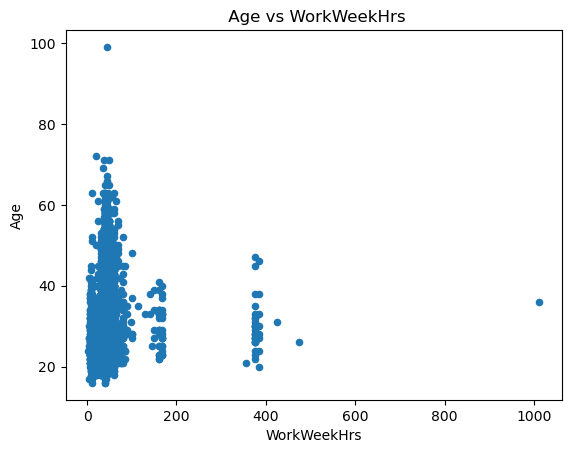

In [ ]:
# your code goes here

plt.figure(figsize=(8, 6))
df.plot(x='WorkWeekHrs', y='Age', kind='scatter')
plt.title(' Age vs WorkWeekHrs')
plt.ylabel('Age')
plt.xlabel('WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


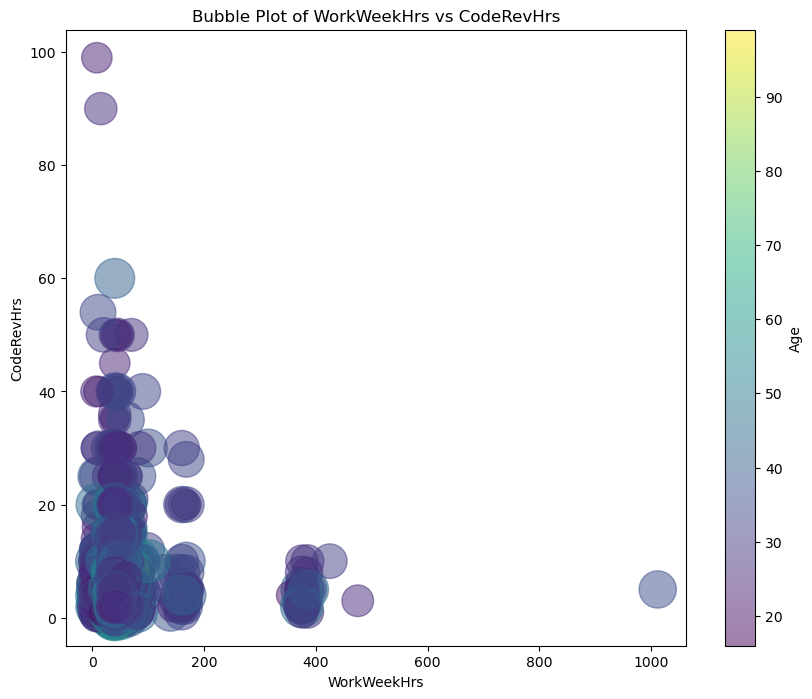

In [ ]:
# your code goes here

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], c=df['Age'], cmap='viridis', alpha=0.5, s=df['Age']*20)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

# Set labels and title
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

# Show the plot
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names.

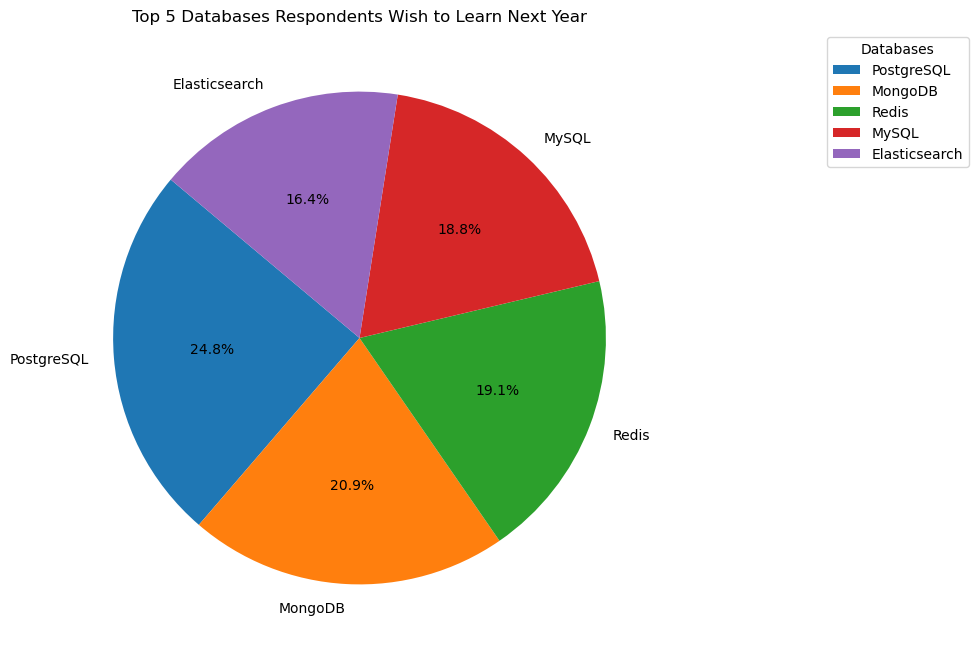

In [ ]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5;

"""

df2 = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(8, 8))
plt.pie(df2['Count'], labels=df2['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.legend(title='Databases', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))  # Add legend
plt.show()


# Show the plot
plt.show()



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1800x600 with 0 Axes>

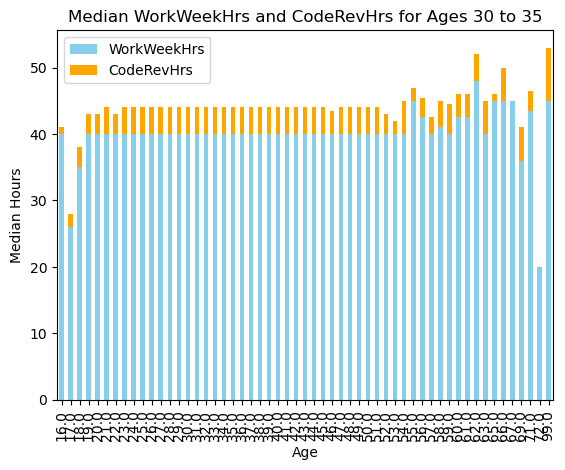

In [ ]:
# your code goes here

median_values = df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

# Plot a stacked chart
plt.figure(figsize=(18, 6))
median_values.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Median WorkWeekHrs and CodeRevHrs for Ages 30 to 35')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


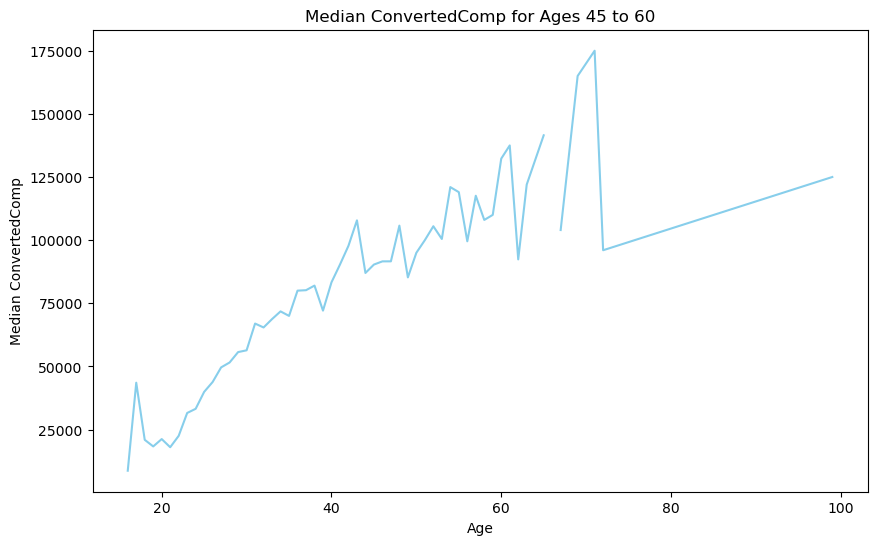

In [ ]:
# your code goes here

median_values = df.groupby('Age')['ConvertedComp'].median()

plt.figure(figsize=(10, 6))
median_values.plot(kind='line', color='skyblue')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64


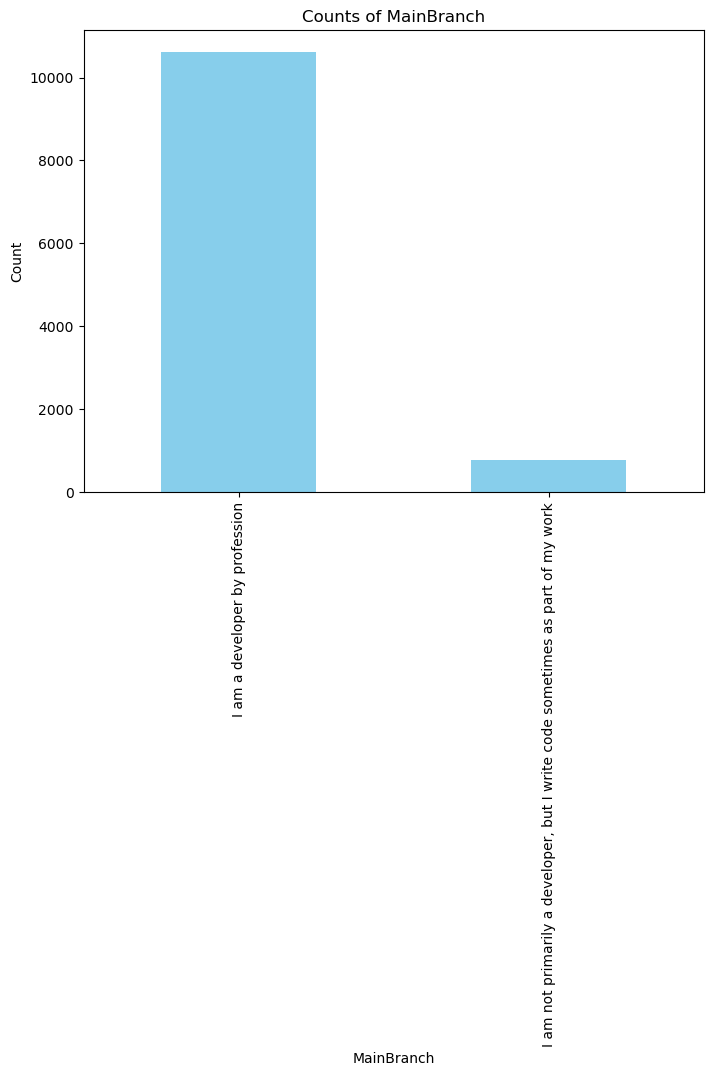

In [ ]:
# your code goes here

main_branch_counts = df['MainBranch'].value_counts()

# Display the counts
print(main_branch_counts)

# Plot a bar chart of the counts
plt.figure(figsize=(8, 6))
main_branch_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of MainBranch')
plt.xlabel('MainBranch')
plt.ylabel('Count')
plt.show()

Close the database connection.


In [ ]:
conn.close()